<a href="https://colab.research.google.com/github/GN-1903/Mini-Stock-Advisor/blob/main/Mini_Stock_Advisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R

# 1. Create sample 10-day dataset
stock_data <- data.frame(
  Day   = 1:10,
  Open  = c(100, 102, 101, 103, 104, 103, 102, 101, 100,  99),
  Close = c(102, 104, 100, 106, 103, 100, 101,  99, 103,  96)
)

stock_data$PercentChange <- (stock_data$Close - stock_data$Open) / stock_data$Open * 100

stock_data$PrevPercentChange <- c(NA, head(stock_data$PercentChange, -1))

print(stock_data)

   Day Open Close PercentChange PrevPercentChange
1    1  100   102     2.0000000                NA
2    2  102   104     1.9607843         2.0000000
3    3  101   100    -0.9900990         1.9607843
4    4  103   106     2.9126214        -0.9900990
5    5  104   103    -0.9615385         2.9126214
6    6  103   100    -2.9126214        -0.9615385
7    7  102   101    -0.9803922        -2.9126214
8    8  101    99    -1.9801980        -0.9803922
9    9  100   103     3.0000000        -1.9801980
10  10   99    96    -3.0303030         3.0000000


In [ ]:
%%R

stock_data$BuyRule <- with(stock_data,
  PercentChange > 2 |
  (PercentChange > 0 & PrevPercentChange > 0)
)

stock_data$SellRule <- with(stock_data,
  PercentChange < -2 |
  (PercentChange < 0 & PrevPercentChange < 0)
)

stock_data$Signal <- "HOLD"

stock_data$Signal[stock_data$BuyRule] <- "BUY"
stock_data$Signal[stock_data$SellRule] <- "SELL"

hold_condition <- with(stock_data,
  !BuyRule & !SellRule & PercentChange >= -2 & PercentChange <= 2
)
stock_data$Signal[hold_condition] <- "HOLD"

print(stock_data)

   Day Open Close PercentChange PrevPercentChange BuyRule SellRule Signal
1    1  100   102     2.0000000                NA      NA    FALSE   HOLD
2    2  102   104     1.9607843         2.0000000    TRUE    FALSE    BUY
3    3  101   100    -0.9900990         1.9607843   FALSE    FALSE   HOLD
4    4  103   106     2.9126214        -0.9900990    TRUE    FALSE    BUY
5    5  104   103    -0.9615385         2.9126214   FALSE    FALSE   HOLD
6    6  103   100    -2.9126214        -0.9615385   FALSE     TRUE   SELL
7    7  102   101    -0.9803922        -2.9126214   FALSE     TRUE   SELL
8    8  101    99    -1.9801980        -0.9803922   FALSE     TRUE   SELL
9    9  100   103     3.0000000        -1.9801980    TRUE    FALSE    BUY
10  10   99    96    -3.0303030         3.0000000   FALSE     TRUE   SELL


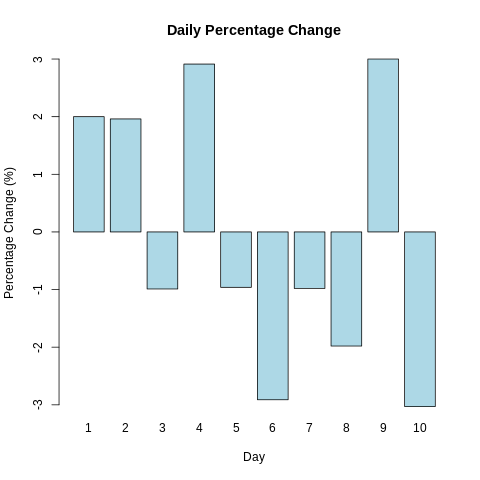

In [ ]:
%%R
# Bar Plot
barplot(
  stock_data$PercentChange,
  names.arg = stock_data$Day,
  xlab = "Day",
  ylab = "Percentage Change (%)",
  main = "Daily Percentage Change",
  col = "lightblue"
)

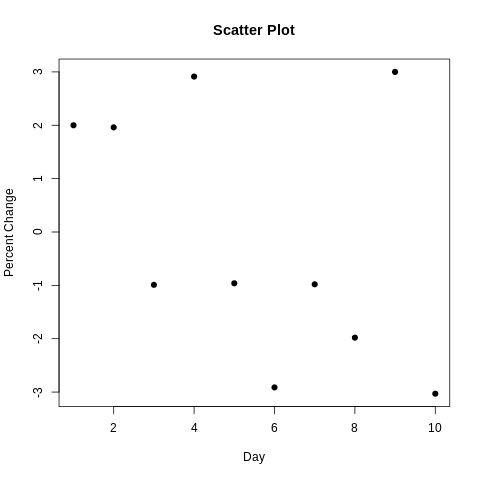

In [ ]:
%%R
# Scatter Plot
plot(
  stock_data$Day,
  stock_data$PercentChange,
  pch = 19,
  xlab = "Day",
  ylab = "Percent Change",
  main = "Scatter Plot"
)

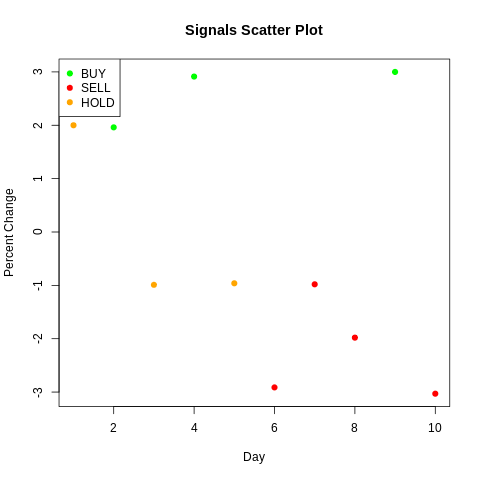

In [ ]:
%%R
# Scatter Plot with BUY/SELL/HOLD Colors
colors <- ifelse(stock_data$Signal == "BUY", "green",
          ifelse(stock_data$Signal == "SELL", "red", "orange"))

plot(
  stock_data$Day,
  stock_data$PercentChange,
  col = colors,
  pch = 19,
  xlab = "Day",
  ylab = "Percent Change",
  main = "Signals Scatter Plot"
)

legend("topleft", legend = c("BUY","SELL","HOLD"),
       col = c("green","red","orange"), pch = 19)